In [ ]:
!pip3 install numpy sklearn pandas matplotlib seaborn

In [ ]:
#Importing the libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import time

%matplotlib inline

In [ ]:
#Read the file
df = pd.read_csv("wdbc.dataset",header = None)
df = df.rename(columns = {0:"id",1:"cancer_type"}) # CHange the column names of 1 and 2 for better understanding

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(df.shape))
df.info()

df.head()


 	 The data frame has 569 rows and 32 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   cancer_type  569 non-null    object 
 2   2            569 non-null    float64
 3   3            569 non-null    float64
 4   4            569 non-null    float64
 5   5            569 non-null    float64
 6   6            569 non-null    float64
 7   7            569 non-null    float64
 8   8            569 non-null    float64
 9   9            569 non-null    float64
 10  10           569 non-null    float64
 11  11           569 non-null    float64
 12  12           569 non-null    float64
 13  13           569 non-null    float64
 14  14           569 non-null    float64
 15  15           569 non-null    float64
 16  16           569 non-null    float64
 17  17           569 non-null    float64
 18  

,id,cancer_type,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Convert the cancer type column to an integer for the classification
str_to_int = {'M':1, 'B':0} #M (Malignant) and Diagnosis = B (Benign)
df['cancer_type'] = df['cancer_type'].map(str_to_int) #Every entry should be numerical so changing M with 1 and B with 0.

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   cancer_type  569 non-null    int64  
 2   2            569 non-null    float64
 3   3            569 non-null    float64
 4   4            569 non-null    float64
 5   5            569 non-null    float64
 6   6            569 non-null    float64
 7   7            569 non-null    float64
 8   8            569 non-null    float64
 9   9            569 non-null    float64
 10  10           569 non-null    float64
 11  11           569 non-null    float64
 12  12           569 non-null    float64
 13  13           569 non-null    float64
 14  14           569 non-null    float64
 15  15           569 non-null    float64
 16  16           569 non-null    float64
 17  17           569 non-null    float64
 18  18           569 non-null    float64
 19  19      

,id,cancer_type,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Fetching the number of malignant and benign values that are present in the given dataset
diagnosis_all = list(df.shape)[0]
diagnosis_categories = list(df['cancer_type'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, diagnosis_categories[0], diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [ ]:
features_mean= list(df.columns[0:11])

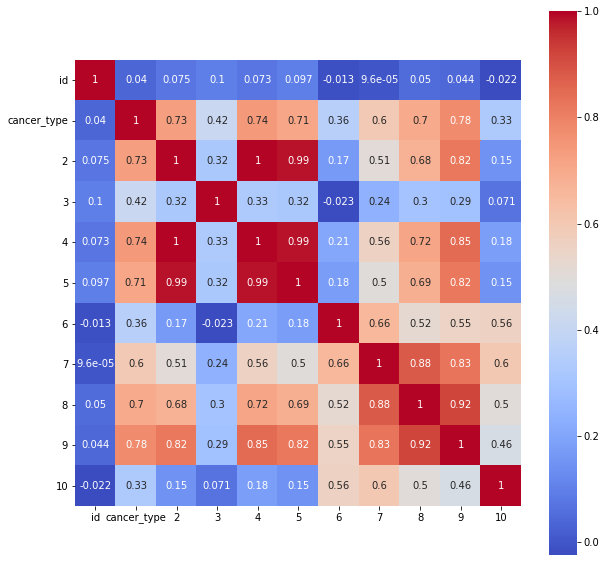

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [ ]:
#Assign the id column to a variable and removing it from dataset as it is not required to develop a model.
id = df["id"]
id = pd.DataFrame(id)
df = df.drop(columns = "id")
df.head(569)

,cancer_type,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Assign the id column to a variable and removing it from dataset temporarily as it can't be scaled.
cancer_data = df["cancer_type"]
cancer_data = pd.DataFrame(cancer_data)
df = df.drop(columns = "cancer_type")
df.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Scaling the remaining 30 columns using sklearn library.
scaler = MinMaxScaler(copy = False)
df = scaler.fit_transform(df)

In [ ]:
#Convert the scaled data into dataframe
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
#Adding the cancer type back to the dataset.
df["cancer_type"] = cancer_data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,cancer_type
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1


In [ ]:
#Partition the data into x and y.
x = df.drop(columns = "cancer_type")
y = df["cancer_type"]
y=y.astype('int')

In [ ]:
#Convert the x and y into the numpy array for easy calculations.
x = np.asarray(x)
y = np.asarray(y)

In [ ]:
#Further partition it to the test and train data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [ ]:
#Import the SGD classifier for training the data
from sklearn.linear_model import SGDClassifier

accuracy_all = []

start = time.time()

sgdclf = SGDClassifier()
sgdclf.fit(X_train, y_train) #Fitting the train data into the classifier
prediction = sgdclf.predict(X_test) # Testing the learned model on the test data and predicting the target variable
y_train_pred = cross_val_predict(sgdclf, X_test, y_test, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Execution time: {0:.5} seconds \n".format(end-start))
print(y_train_pred)

SGD Classifier Accuracy: 93.86%
Execution time: 0.0093746 seconds 

[0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0]


In [ ]:
#Find the confusion matrix to calculate accuracy of the system
from sklearn.metrics import confusion_matrix
y_train_pred = y_train_pred.astype('int')
confusionmatrix = confusion_matrix(y_test, y_train_pred)
print(y_train_pred)
print(confusionmatrix)

[0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0]
[[70  2]
 [ 3 39]]


In [ ]:
#Calculate the accuracy
Accuracy = (confusionmatrix[0][0]+confusionmatrix[1][1])/(confusionmatrix[0][0]+confusionmatrix[1][1]+confusionmatrix[1][0]+confusionmatrix[0][1])
print('Accuracy: {0: .2%}'.format(Accuracy))

Accuracy:  95.61%


In [ ]:
#Calculate the precision
Precision = (confusionmatrix[0][0])/(confusionmatrix[0][0]+confusionmatrix[1][0]) #calculating using formula
print('Precision: {0: .2%}'.format(Precision))

Precision:  95.89%


In [ ]:
#Calculate the recall
Recall = (confusionmatrix[0][0])/(confusionmatrix[0][0]+confusionmatrix[0][1])
print('Recall:  %.3f' % Recall)

Recall:  0.972


In [ ]:
#Calculate the cross val predict using the scikitlearn library
cross_validation_predict = cross_val_predict(sgdclf, X_train, y_train, cv=5) #cross_val_predict returns predicted y values for the test fold.
print(cross_validation_predict)

[1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 0 0]


In [ ]:
#Calculate the cross val score using the scikitlearn library
cross_validation_score = cross_val_score(sgdclf,X_train,y_train,cv=5)
print(cross_validation_score)

cross_validation_score_test = cross_val_score(sgdclf,X_test,y_test,cv=5)
print(cross_validation_score_test)

[0.94505495 0.94505495 0.97802198 0.98901099 0.98901099]
[0.95652174 1.         0.95652174 0.86956522 1.        ]


In [ ]:
""" Prbabilities are being calculated for the ROC Curves.
I modelled with logistic loss which gives us the probability values as hinge loss can't provide the probabilities while training the data."""
sgdclf_log = SGDClassifier(loss = "log")
sgdclf_log.fit(X_train, y_train)
probability = sgdclf_log.predict_proba(X_test)

In [ ]:
#Divide the probability into 2 classes. 
probability_positive = probability[:, 1]
probability_negative = probability[:, 0]

In [ ]:
# Calculate the auc positives using sklearn library
auc_positive = roc_auc_score(y_test, probability_positive)
print('AUC_POSITIVE: %.2f' % auc_positive)
auc_negative = roc_auc_score(y_test, probability_negative)
print('AUC_NEGATIVE: %.2f' % auc_negative)

AUC_POSITIVE: 0.99
AUC_NEGATIVE: 0.01


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probability_positive)

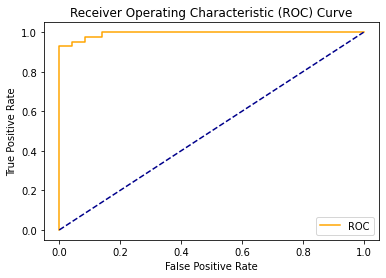

In [ ]:
#plot the curves
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

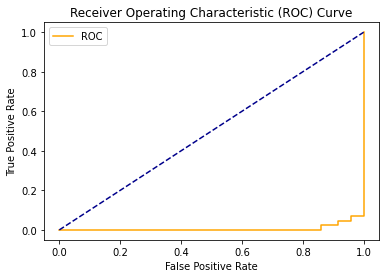

In [ ]:
fpr_n, tpr_n, thresholds = roc_curve(y_test, probability_negative)
plt.plot(fpr_n, tpr_n, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()